P2

a) The choice of introducing a column for missing data seems reasonable. This can lead to more insights than if we got rid of rows with missing features or features with lots of missing data. Missing data can also suggest things about the quality of the restaurant, like how much the restaurant owner cares about maximizing the exposure of the business and how much they care about online feedback. 



In [121]:
import pandas as pd
import numpy as np
import os
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import roc_curve, auc 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
os.chdir('/Users/Britt/Desktop/IND142')


In [13]:
yelp_train = pd.read_csv("yelp142_train.csv")
yelp_test = pd.read_csv("yelp142_test.csv")
yelp_train.head()

,stars,review_count,GoodForKids,Alcohol,BusinessAcceptsCreditCards,WiFi,BikeParking,ByAppointmentOnly,WheelechairAccessible,OutdoorSeating,RestaurantsReservations,DogsAllowed,Caters
0,4.5,16,(Missing),'none',TRUE,'no',FALSE,(Missing),FALSE,FALSE,TRUE,(Missing),FALSE
1,3.5,537,TRUE,'beer_and_wine',TRUE,'no',TRUE,(Missing),TRUE,FALSE,TRUE,FALSE,TRUE
2,3.0,444,TRUE,'full_bar',TRUE,'no',TRUE,(Missing),TRUE,TRUE,TRUE,FALSE,TRUE
3,3.0,4,(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing),(Missing)
4,5.0,3,(Missing),(Missing),TRUE,'no',(Missing),(Missing),TRUE,(Missing),(Missing),(Missing),(Missing)


In [44]:
#bi
# Define the OLS regression model
ols = smf.ols(formula="stars ~ review_count \
                          + C(GoodForKids, Treatment(reference='(Missing)'))\
                          + C(Alcohol, Treatment(reference='(Missing)')) \
                          + C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)')) \
                          + C(WiFi, Treatment(reference='(Missing)')) \
                          + C(BikeParking, Treatment(reference='(Missing)')) \
                          + C(ByAppointmentOnly, Treatment(reference='(Missing)')) \
                          + C(WheelechairAccessible, Treatment(reference='(Missing)')) \
                          + C(OutdoorSeating, Treatment(reference='(Missing)')) \
                          + C(RestaurantsReservations, Treatment(reference='(Missing)')) \
                          + C(DogsAllowed, Treatment(reference='(Missing)')) \
                          + C(Caters, Treatment(reference='(Missing)'))", data=yelp_train)

# Fit the model
model_ols = ols.fit()

print(model_ols.summary())


                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     52.38
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          1.46e-235
Time:                        13:00:39   Log-Likelihood:                -7239.0
No. Observations:                6272   AIC:                         1.453e+04
Df Residuals:                    6246   BIC:                         1.471e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [14]:
#bii

#Split yelp data into train and test set
X_train = pd.get_dummies(yelp_train.drop(["stars"],axis=1))
Y_train = yelp_train["stars"]
X_test = pd.get_dummies(yelp_test.drop(["stars"],axis=1))
Y_test = yelp_test["stars"]

In [29]:
#Perform K-fold validation for ccp_alpha from values 0 to 200
dtr = DecisionTreeRegressor()
cv = KFold(n_splits = 5, random_state = 42, shuffle = True)
dtr_cv = GridSearchCV(dtr, param_grid = {"ccp_alpha" : np.linspace(0, 0.1, 201)}, scoring = "r2", cv=cv, verbose = 0)
dtr_cv.fit(X_train,Y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.017...
       0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755,
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ])},
             scoring='r2')

In [30]:
dtr_cv.best_params_

{'ccp_alpha': 0.001}

I found the optimal ccp_alpha by setting up a 5 fold cross validation on the training data. I set up a grid
of 201 values from 0 to 0.1 with 0.0005 between each value. In doing so, I found the ccp_alpha value
that optimizes R^2. 

In [74]:
#biii

y_pred_ols = model_ols.predict(yelp_test.drop(["stars"],axis=1))

y_pred_tree = dtr_cv.predict(X_test)

# OSR^2 for Linear Model
linear_r2 = r2_score(Y_test, y_pred_ols)

# OSR^2 for dtr
tree_r2 = r2_score(Y_test, y_pred_tree)

# MAE for Linear Model
linear_mae = mean_absolute_error(Y_test, y_pred_ols)

# MAE for dtr
tree_mae = mean_absolute_error(Y_test, y_pred_tree)

print(f"OLS Regression - OSR^2: {linear_r2}, MAE: {linear_mae}")
print(f"Regression Tree - OSR^2: {tree_r2}, MAE: {tree_mae}")



OLS Regression - OSR^2: 0.1479903608687121, MAE: 0.6259556143398644
Regression Tree - OSR^2: 0.15244833932458812, MAE: 0.6176565182771473


The performance of both models are evenly subpar. The low OSR2 values suggest
both models produce unsatisfactory predictions on the testing data. 

In [152]:
#2c
above4_train = [1 if i >= 4.0 else 0 for i in yelp_train["stars"]]
above4_test = [1 if i >= 4.0 else 0 for i in yelp_test["stars"]]
yelp_train_4s = yelp_train.copy()
yelp_test_4s = yelp_test.copy()
yelp_train_4s["fourOrAbove"] = above4_train
yelp_test_4s["fourOrAbove"] = above4_test
yelp_train_4s.drop(["stars"], axis=1, inplace=True)
yelp_test_4s.drop(["stars"], axis=1, inplace=True)

2d)

i) Yes, it's reasonable to weigh FP and FN equally. There's no indication that the cost of misclassifying an under 4 star restaurant is different than misclassifyig an above 4 star restaurant. 


In [77]:
#ii)
#convert ols predictions
y_pred_ols_4 = [1 if i >= 4.0 else 0 for i in y_pred_ols]

#convert dtr predictions
y_pred_tree_4 = [1 if i >= 4.0 else 0 for i in y_pred_tree]

In [81]:
#iii)
# Define the Logistic regression model
logreg = smf.logit(formula="fourOrAbove ~ review_count \
                          + C(GoodForKids, Treatment(reference='(Missing)'))\
                          + C(Alcohol, Treatment(reference='(Missing)')) \
                          + C(BusinessAcceptsCreditCards, Treatment(reference='(Missing)')) \
                          + C(WiFi, Treatment(reference='(Missing)')) \
                          + C(BikeParking, Treatment(reference='(Missing)')) \
                          + C(ByAppointmentOnly, Treatment(reference='(Missing)')) \
                          + C(WheelechairAccessible, Treatment(reference='(Missing)')) \
                          + C(OutdoorSeating, Treatment(reference='(Missing)')) \
                          + C(RestaurantsReservations, Treatment(reference='(Missing)')) \
                          + C(DogsAllowed, Treatment(reference='(Missing)')) \
                          + C(Caters, Treatment(reference='(Missing)'))", data=yelp_train_4s)

# Fit the model
model_log = logreg.fit()

print(model_log.summary())


Optimization terminated successfully.
         Current function value: 0.608425
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            fourOrAbove   No. Observations:                 6272
Model:                          Logit   Df Residuals:                     6246
Method:                           MLE   Df Model:                           25
Date:                Thu, 12 Oct 2023   Pseudo R-squ.:                  0.1135
Time:                        13:44:02   Log-Likelihood:                -3816.0
converged:                       True   LL-Null:                       -4304.8
Covariance Type:            nonrobust   LLR p-value:                3.284e-190
                                                                               coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------

In [153]:
#iv)
Y_4_train = yelp_train_4s["fourOrAbove"]
X_4_train = pd.get_dummies(yelp_train_4s.drop(["fourOrAbove"], axis=1))
Y_4_test = yelp_test_4s["fourOrAbove"]
X_4_test = pd.get_dummies(yelp_test_4s.drop(["fourOrAbove"], axis=1))

In [155]:
#Perform K-fold validation for ccp_alpha from values 0 to 0.1
dtc = DecisionTreeClassifier()
cv = KFold(n_splits = 5, random_state = 42, shuffle = True)
dtc_cv = GridSearchCV(dtc, param_grid = {"ccp_alpha" : np.linspace(0, 0.1, 201)}, scoring = "r2", cv=cv, verbose = 0)
dtc_cv.fit(X_4_train,Y_4_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': array([0.    , 0.0005, 0.001 , 0.0015, 0.002 , 0.0025, 0.003 , 0.0035,
       0.004 , 0.0045, 0.005 , 0.0055, 0.006 , 0.0065, 0.007 , 0.0075,
       0.008 , 0.0085, 0.009 , 0.0095, 0.01  , 0.0105, 0.011 , 0.0115,
       0.012 , 0.0125, 0.013 , 0.0135, 0.014 , 0.0145, 0.015 , 0.0155,
       0.016 , 0.0165, 0.01...
       0.072 , 0.0725, 0.073 , 0.0735, 0.074 , 0.0745, 0.075 , 0.0755,
       0.076 , 0.0765, 0.077 , 0.0775, 0.078 , 0.0785, 0.079 , 0.0795,
       0.08  , 0.0805, 0.081 , 0.0815, 0.082 , 0.0825, 0.083 , 0.0835,
       0.084 , 0.0845, 0.085 , 0.0855, 0.086 , 0.0865, 0.087 , 0.0875,
       0.088 , 0.0885, 0.089 , 0.0895, 0.09  , 0.0905, 0.091 , 0.0915,
       0.092 , 0.0925, 0.093 , 0.0935, 0.094 , 0.0945, 0.095 , 0.0955,
       0.096 , 0.0965, 0.097 , 0.0975, 0.098 , 0.0985, 0.099 , 0.0995,
       0.1   ])},
             scoring='r2')

In [156]:
dtc_cv.best_params_

{'ccp_alpha': 0.002}

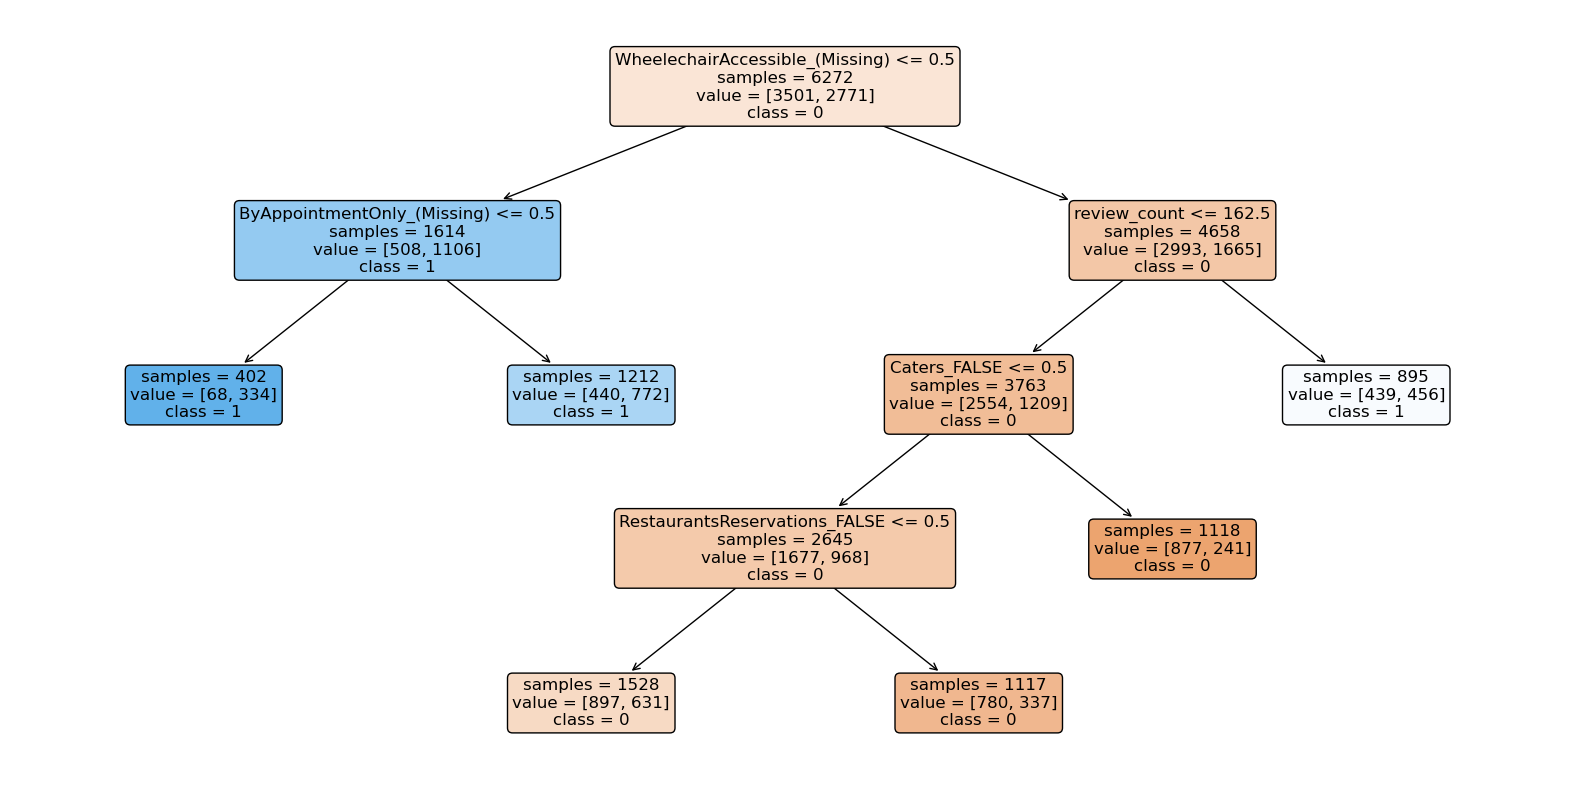

In [166]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10)) 
plot_tree(dtc_cv.best_estimator_,
          feature_names=X_4_train.columns.tolist(), 
          class_names=['0', '1'],
          filled=True,
          impurity=False,
          rounded=True, fontsize=12)
plt.show()


In [96]:
#v)
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#write a function to get fpr from true y values and y predictions by model
def get_fpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    fpr = fp / (fp + tn)
    return fpr

In [99]:
#Baseline model
BL_pred = pd.Series(0, index=Y_4_test.index)
accuracy = accuracy_score(Y_4_test,BL_pred)
TPR = recall_score(Y_4_test, BL_pred)
FPR = get_fpr(Y_4_test, BL_pred)
print(f'Accuracy: {accuracy},TPR:{TPR}, FPR:{FPR}')

Accuracy: 0.5598958333333334,TPR:0.0, FPR:0.0


In [100]:
#Linear Threshold 
accuracy = accuracy_score(Y_4_test,y_pred_ols_4)
TPR = recall_score(Y_4_test, y_pred_ols_4)
FPR = get_fpr(Y_4_test, y_pred_ols_4)
print(f'Accuracy: {accuracy},TPR:{TPR}, FPR:{FPR}')

Accuracy: 0.6324404761904762,TPR:0.21386306001690616, FPR:0.038538205980066444


In [101]:
#DTR Threshold 
accuracy = accuracy_score(Y_4_test,y_pred_tree_4)
TPR = recall_score(Y_4_test, y_pred_tree_4)
FPR = get_fpr(Y_4_test, y_pred_tree_4)
print(f'Accuracy: {accuracy},TPR:{TPR}, FPR:{FPR}')

Accuracy: 0.6261160714285714,TPR:0.2062552831783601, FPR:0.043853820598006646


In [111]:
#Logistic

#Convert predicted probabilities to 0 and 1
log_prob = model_log.predict(yelp_test_4s)
log_pred = (log_prob > 0.5).astype(int)

accuracy = accuracy_score(Y_4_test,log_pred)
TPR = recall_score(Y_4_test, log_pred)
FPR = get_fpr(Y_4_test, log_pred)
print(f'Accuracy: {accuracy},TPR:{TPR}, FPR:{FPR}')

Accuracy: 0.6759672619047619,TPR:0.47928994082840237, FPR:0.16943521594684385


In [157]:
#DTC Threshold
y_pred_dtc = dtc_cv.predict(X_4_test)
accuracy = accuracy_score(Y_4_test,y_pred_dtc)
TPR = recall_score(Y_4_test, y_pred_dtc)
FPR = get_fpr(Y_4_test, y_pred_dtc)
print(f'Accuracy: {accuracy},TPR:{TPR}, FPR:{FPR}')

Accuracy: 0.6573660714285714,TPR:0.5435333896872359, FPR:0.253156146179402


In [160]:
data = {
    "Baseline": [0.56, 0.000, 0.000],
    "Linear - Threshold": [0.632, 0.214, 0.385],
    "DTR - Threshold": [0.626, 0.206, 0.044],
    "Logistic": [0.676, 0.479, 0.169],
    "DTC": [0.657, 0.544, 0.253],
}

index_labels = ["Accuracy", "TPR", "FPR"]

df = pd.DataFrame(data, index=index_labels)
df

,Baseline,Linear - Threshold,DTR - Threshold,Logistic,DTC
Accuracy,0.56,0.632,0.626,0.676,0.657
TPR,0.00,0.214,0.206,0.479,0.544
FPR,0.00,0.385,0.044,0.169,0.253


The Logistic, and DTC models seem to outperform the baseline and linear model. They have decent accuracy, decent
TPR and acceptable FPR. This suggest they have predictive power for both positive and negative cases, setting them apart from the baseline model. However, I'd go with the logistic model as it yields higher accuracy and lower FPR. 
Also, the classification tree require more tuning and is more prone to overfitting, wheras the logistic regression is a lot less complex. The clear probabilistic results provided by logistic model can also be useful for the decision makers. 